
# Project: Investigating a Kaggle Dataset on No-Show Medical Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This is a Kaggle dataset having 110,527 medical appointments collected from Brazil. It also includes 14 associated variables (characteristics). <br>
However, we shall investigate the dataset and try to understand the facts behind the no-show appointments. <br>
Now, let's get intruduced with the 14 characteristics i.e. the description of each column: <br>

>01 - PatientId: Identification of a patient <br>
02 - AppointmentID: Identification of each appointment <br>
03 - Gender: Male or Female <br>
05 - ScheduledDay: The day someone called or registered the appointment <br>
04 - AppointmentDay: The day when they have to visit the doctor <br>
06 - Age: Age of the patient <br>
07 - Neighbourhood: Where the appointment takes place <br>
08 - Scholarship: True or False. In the dataset ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian social welfare program "Bolsa Família" that provides financial aid to poor Brazilian families <br>
09 - Hipertension: True or False <br>
10 - Diabetes: True or False <br>
11 - Alcoholism: True or False <br>
12 - Handicap: True or False <br>
13 - SMS_received: 1 or more messages sent to the patient, True or False <br>
14 - No-show: True or False. Here, No = showed, and Yes = did not show <br>
Although not specified in the Kaggle page or dataset-set-options document, we will consider True = 1 and False = 0. <br>

For analysis purpose, we shall consider 'No-show' as dependent variables and 'Age', 'SMS_received' and 'Scholarship' as independent variable. We'll try to figure out whether there is any correlations between these factors and the patient's show up or not. <br>

The questions we'll answer are: <br>

 1. What percentage of patients did not show up?</font> <br>
 2. Do older patient's tend to miss their appointments in comparison to younger patients?</font> <br>
 3. Does sending SMS message about appointments has influence on patient's show up or not?</font> <br>
 4. Does financial ability of the patients has any influence on no-show appointments?</font> <br>


First of all, we want to import the necessary packages we will be using. <br>


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

Now that we have imported the necessary packages, it's time to load the dataset and prepare it for analysis. We'll try to understand the structure of the dataset and clean/manipulate it, where necessary, for smooth analysis purpose.


### General Properties

At this stage, we shall load the dataset and have a quick look on first few rows as well as the total number of rows and colums.

In [3]:
df = pd.read_csv('noshowapp.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

We can see here that there are total 110,527 rows and 14 columns in the dataset. Now we want to check:<br>
- Whether there is any duplicate and missing value or not
- Whether we need to drop any unnecessary column or not 
- Whether we need to rename any column or not
- Whether we need to change the data type of any column or not
- Whether there is any inconsistency in the dataset or not

### Scrabbing the dataset for more accurate analysis:

In this stage, the first thing we will do is to check whether there is any missing value or not.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Looks like there is no missing value in the dataset, as all columns have the same number of values. Now we will check for any duplicate values.

In [6]:
df.duplicated().sum()

0

Looks like there is no duplicate value also. Now if we look at the dataset, it appears that we don't need all the 14 columns to answer our questions. Therefore it will be a good idea to drop the unnecessary columns and narrow down the dataset in order to make it short and simple.

In [7]:
df.drop(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'], axis=1, inplace = True)

Now we have to confirm that the columns are deleted

In [8]:
df.head()

,Age,Scholarship,SMS_received,No-show
0,62,0,0,No
1,56,0,0,No
2,62,0,0,No
3,8,0,0,No
4,56,0,0,No


The table is much smaller now and easier to explore. Now it appears that we need to make a little change in our column names. To make all column names identical, we want all column names to be lowercase and any dash (-) to be underscore (_).

In [9]:
df.rename(columns = lambda x: x.lower().replace('-','_'), inplace = True)

Now we have to confirm that the changes were made.

In [10]:
df.head()

,age,scholarship,sms_received,no_show
0,62,0,0,No
1,56,0,0,No
2,62,0,0,No
3,8,0,0,No
4,56,0,0,No


Now looks better. Let's check the data type.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   age           110527 non-null  int64 
 1   scholarship   110527 non-null  int64 
 2   sms_received  110527 non-null  int64 
 3   no_show       110527 non-null  object
dtypes: int64(3), object(1)
memory usage: 3.4+ MB


Looks good. But for further convenience, we would like to change the values of sms_received from 0/1 to Yes/No. And in order to do that we need to change the data type of "sms_received" from 'integer' to 'string' first.

In [12]:
df.sms_received = df.sms_received.astype(str)

Let's confirm the change.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   age           110527 non-null  int64 
 1   scholarship   110527 non-null  int64 
 2   sms_received  110527 non-null  object
 3   no_show       110527 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.4+ MB


Now it's time to change the values of sms_received from 0/1 to Yes/No.

In [14]:
df.sms_received.replace({"0":"No", "1":"Yes"}, inplace = True)

Let's confirm the change.

In [15]:
df.head()

,age,scholarship,sms_received,no_show
0,62,0,No,No
1,56,0,No,No
2,62,0,No,No
3,8,0,No,No
4,56,0,No,No


At this point we would like to see the summary statistics in order to better grasp the dataset.

In [16]:
df.describe()

,age,scholarship
count,110527.000000,110527.000000
mean,37.088874,0.098266
std,23.110205,0.297675
min,-1.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,0.000000
75%,55.000000,0.000000
max,115.000000,1.000000


The range of the 'age' column is a bit interesting. The eldest person in the dataset is 115 years old and the youngest one is -1 !!<br> As age cannot be negative, we would treat it as typo. However, we shall go ahead and delete the rows. To do this, first we have to figure out the number of negative values.

In [17]:
df.age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

Looks like we have only one negative value. Now we want to identify the location of the value.

In [18]:
df.query('age == -1')

,age,scholarship,sms_received,no_show
99832,-1,0,No,No


As we found the index number of the row, we shall go ahead and delete the row.

In [19]:
df.drop(df.index[99832], inplace = True)

Let's confirm the change.

In [20]:
df.describe()

,age,scholarship
count,110526.000000,110526.000000
mean,37.089219,0.098266
std,23.110026,0.297676
min,0.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,0.000000
75%,55.000000,0.000000
max,115.000000,1.000000


Now the dataset looks clean and ready to move forward towards the exploration phase.

<a id='eda'></a>
## Exploratory Data Analysis

At this stage, we will explore the dataset and answer the questions we posed in the introduction section.

### Research Question 1 : What percentage of patients did not show up?

To answer this question, first of all we need to figure out how many patients showed-up and how many patients did not show-up. Hence, we need the total number of 'Yes' and the total number of 'No' from the 'no_show' column.

In [21]:
df_q1 = df.no_show.value_counts()
df_q1

No     88207
Yes    22319
Name: no_show, dtype: int64

Here, as per column description, 'No' represents the number of patients showed-up and 'Yes' represents the number of patients did not show-up. Now it will be easier for us to find out the percentage of patients showed-up and the percentage of patients did not show-up.

In [22]:
patients_showed_up = df_q1.No # this represents the number of patients showed-up
patients_showed_up

88207

In [23]:
patients_did_not_show_up = df_q1.Yes  # this represents the number of patients did not show-up
patients_did_not_show_up

22319

In [24]:
total_patients = df.shape[0]  # this represents the total number of patients
total_patients

110526

In [25]:
percentage_showed_up = (patients_showed_up/total_patients)*100   # this represents the percentage of patients showed-up
percentage_no_show = (patients_did_not_show_up/total_patients)*100   # this represents the percentage of patients did not show-up

Let's see the values of the percentage of patients showed-up and the percentage of patients did not show-up.

In [26]:
print(percentage_no_show, percentage_showed_up)

20.193438647919944 79.80656135208005


Now let's plot our findings in a bar chart for an easy visualization.

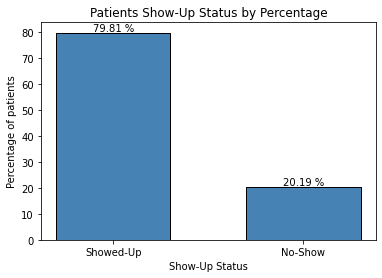

In [27]:
locations = [0, 1]
heights = [percentage_showed_up, percentage_no_show]
labels = ['Showed-Up', 'No-Show']
plt.bar(locations, heights, tick_label=labels, facecolor='steelblue', edgecolor='black', width=0.6 )
plt.title('Patients Show-Up Status by Percentage')
plt.xlabel('Show-Up Status')
plt.ylabel('Percentage of patients')

for i in range(len(locations)):
    plt.text(i,heights[i], f"{round(heights[i],2)} %", ha='center', va='bottom') # to show the data level on top of the bars   

plt.show()

Here it's clearly visible that 20.19% or one fifth of the total patients who scheduled for appointment did not show-up. As 20% is a significant number, we would like to add that further investigation may be required to figure out why 1 out of every 5 patients did not show-up even after scheduling their appointments.

### Research Question 2 : Do older patient's tend to miss their appointments in comparison to younger patients?

To answer this question, first we need to separate the patients into two different groups who did not show-up and who actually showed-up. Then we will plot both of the groups by age in the same histogram to get a comparative picture.

In [28]:
df_no_show = df.query('no_show == "Yes"')   # These are the patients who did not show-up
df_showed_up = df.query('no_show == "No"')  # These are the patients who showed-up

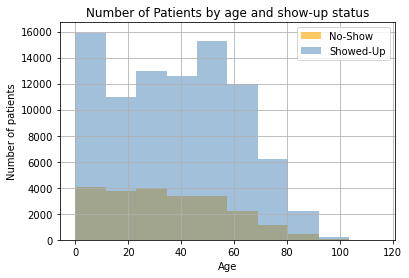

In [29]:
df_no_show.age.hist(alpha=0.6, color='orange')
df_showed_up.age.hist(alpha=0.5, color='steelblue')
plt.title("Number of Patients by age and show-up status")
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.legend(('No-Show', 'Showed-Up'))
plt.show()

Here we can see that, in both cases, the number of younger patients are higher than the older ones. However, to get a more specific answer of our question, we need to dig in a little bit more. In this case, we want to see what percentage of younger patients did not show up and what percentage of older patients did not show up. This will help us to conclude whether older patients tend to miss their appointments or not in comparison to younger patients. However, to do that we will once again separate the patients into two different groups, the younger and the older one. Along with that, statistical information of the dataset will help us in this case.

In [30]:
df.describe()

,age,scholarship
count,110526.000000,110526.000000
mean,37.089219,0.098266
std,23.110026,0.297676
min,0.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,0.000000
75%,55.000000,0.000000
max,115.000000,1.000000


We can see that the median age of the dataset is 37. Therefore, the age limit of our younger group will be 0-37 years and older group will be 38-115 years.

In [31]:
young_group = df.query('age <= 37') # younger group
old_group = df.query('age >= 38') # older group

Now, we will work with the younger group first. We will figure out the percentage of younger patients who showed-up and who did not show-up and finally plot this in a bar chart for clear understanding.

In [32]:
# The number of younger patients who showed-up and who did not show-up
young_group.no_show.value_counts()  

No     43355
Yes    12761
Name: no_show, dtype: int64

In [33]:
# Total number of younger patients
young_group.shape[0]  

56116

Looks like out of total 56,116 younger patients, 43,355 showed-up and 12,761 did not show-up. Let's calculate the percentage of younger patients who showed-up and who did not show-up.

In [34]:
percentge_young_showed_up = (young_group.no_show.value_counts().No/young_group.shape[0])*100  # this represents the percentage of young patients who showed-up
percentage_young_did_not_show_up = (young_group.no_show.value_counts().Yes/young_group.shape[0])*100  # this represents the percentage of younger patients who did not show-up

print(percentge_young_showed_up, percentage_young_did_not_show_up)

77.25960510371374 22.740394896286265


Now let's plot our above findings in a bar chart.

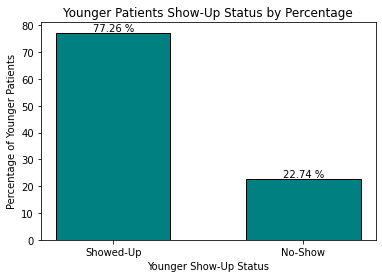

In [35]:
locations = [0, 1]
heights = [percentge_young_showed_up, percentage_young_did_not_show_up]
labels = ['Showed-Up', 'No-Show']
plt.bar(locations, heights, tick_label=labels, facecolor='teal', edgecolor='black', width=0.6 )
plt.title('Younger Patients Show-Up Status by Percentage')
plt.xlabel('Younger Show-Up Status')
plt.ylabel('Percentage of Younger Patients')

for i in range(len(locations)):
    plt.text(i,heights[i], f"{round(heights[i],2)} %", ha='center', va='bottom') # to show the data level on top of the bars   

plt.show()

Here we can see that 22.74% of younger patients did not show-up in comparison to 77.26% of younger patients who actually showed-up. Now, we will work with the older group.

In [36]:
# The number of older patients who showed-up and who did not show-up
old_group.no_show.value_counts() 

No     44852
Yes     9558
Name: no_show, dtype: int64

In [37]:
# Total number of older patients
old_group.shape[0]

54410

Now, in the same way, we will calculate the percentage of older patients who showed-up and who did not show-up.

In [38]:
percentge_old_showed_up = (old_group.no_show.value_counts().No/old_group.shape[0])*100  # this represents the percentage of older patients who showed-up
percentage_old_did_not_show_up = (old_group.no_show.value_counts().Yes/old_group.shape[0])*100  # this represents the percentage of older patients who did not show-up

print(percentge_old_showed_up, percentage_old_did_not_show_up)

82.43337621760706 17.56662378239294


Let's plot our above findings in a bar chart.

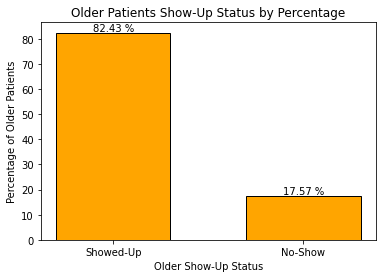

In [39]:
locations = [0, 1]
heights = [percentge_old_showed_up, percentage_old_did_not_show_up]
labels = ['Showed-Up', 'No-Show']
plt.bar(locations, heights, tick_label=labels, facecolor='orange', edgecolor='black', width=0.6 )
plt.title('Older Patients Show-Up Status by Percentage')
plt.xlabel('Older Show-Up Status')
plt.ylabel('Percentage of Older Patients')

for i in range(len(locations)):
    plt.text(i,heights[i], f"{round(heights[i],2)} %", ha='center', va='bottom') # to show the data level on top of the bars   

plt.show()

Now we can clearly see that older patients who did not show-up is 17.57% whereas the younger patients who did not show-up is 22.74%. Hence, according to our dataset we can say that, older patients do not tend to miss their appointments in comparison to younger patients.

### Research Question 3 : Does sending SMS message about appointments has influence on patient's show up or not?

To answer this question, first we need to see how many patients received SMS message and how many didn't.

In [44]:
df_sms = df.sms_received.value_counts()
df_sms

No     75044
Yes    35482
Name: sms_received, dtype: int64

Interesting! As we can see, most of the patients actually didn't receive any SMS message as reminder for their appointment. Now, to get an overall idea, we will subcategorize the above data on the basis of show-up vs no-show using the groupby function.

In [45]:
df.groupby(['sms_received','no_show']).no_show.count()

sms_received  no_show
No            No         62509
              Yes        12535
Yes           No         25698
              Yes         9784
Name: no_show, dtype: int64

This is more interesting! Looks like, out of 75,044 patients (who did not receive SMS), only 12,535 did not show-up. That means, 16.70% actually missed their appointments. On the other hand, out of 35,482 patients (who received SMS) only 9,784 did not show-up. That means, 27.57% actually missed their appointments. <br>

Apparently, the patients who did not receive any SMS had the maximum number of no-show but if we consider the percentage, we can see those who received SMS had the maximum portion of no-show. And this is because, the number of patients who did not receive SMS is almost double in comparison to those patients who received SMS. <br>

However, to get a more clear understanding, we will get all the numbers seperately and plot them in a stacked bar chart.

In [46]:
# Patients who did not receive SMS but showed-up
sms_no_showed_up = df.query('sms_received == "No" & no_show == "No"').no_show.count()
sms_no_showed_up

62509

In [47]:
# Patients who did not receive SMS and no-show
sms_no_no_show = df.query('sms_received == "No" & no_show == "Yes"').no_show.count()
sms_no_no_show

12535

In [48]:
# Patients who received SMS and showed-up
sms_yes_showed_up = df.query('sms_received == "Yes" & no_show == "No"').no_show.count()
sms_yes_showed_up

25698

In [49]:
# Patients who received SMS but no-show
sms_yes_no_show = df.query('sms_received == "Yes" & no_show == "Yes"').no_show.count()
sms_yes_no_show

9784

Now let's plot the above data in a stacked bar chart.

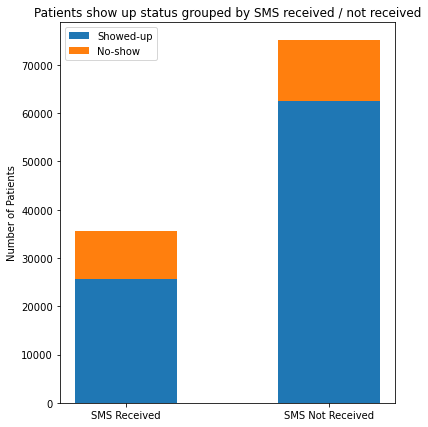

In [51]:
locations = ['SMS Received', 'SMS Not Received']
plt.figure(figsize=(6,7))

show_up = (sms_yes_showed_up, sms_no_showed_up) # Patients who showed-up
no_show = (sms_yes_no_show, sms_no_no_show) # Patients who did not show-up

p1 = plt.bar(locations, show_up, width=0.50)
p2 = plt.bar(locations, no_show, width=0.50, bottom=show_up)

plt.title('Patients show up status grouped by SMS received / not received')
plt.ylabel('Number of Patients')
plt.legend((p1,p2), ('Showed-up', 'No-show'))
plt.show()

From the above graph and analysis, we can see that, overall the number of patients who received SMS is substantially higher than those who didn't receive. But in regards to no-show vs showed-up, there is a smaller differences between patients having received an SMS or not. Moreover, the patients who didn't receive SMS, 16.70% missed their appointment whereas the patients who received SMS, 27.57% missed their appointment. 

Therefore, according to the dataset we can say that, receiving an SMS or not did not seem to have that much influence on the number of no-shows.

### Research Question 4 : Does financial ability of the patients has any influence on no-show appointments?

To answer this question, again we need to separate the patients into two different groups, who took government financial assistance and who did not. Here, for analysis purpose, it is assumed that the patients with limited financial ability and who enrolled in Brazilian social welfare program "Bolsa Família" are denoted as "1" under the scholarship column and treated as poor. On the other hand, patients who were financially well-off are denoted as "0" under the same column and treated as rich.
Then we will see what percentage of poor patients did not show-up in comparison to rich ones.

In [53]:
# Separating the patients into two different groups
poor_patients = df.query('scholarship == 1') # poor group
rich_patients = df.query('scholarship == 0') # rich group

Now we will work with the poor group first.

In [54]:
# Total number of poor patients
poor_patients.shape[0]

10861

In [55]:
# Number of poor patients who showed-up and who did not show-up
poor_patients.no_show.value_counts()

No     8283
Yes    2578
Name: no_show, dtype: int64

Here we can see that out of 10861 poor patients, 8283 showed-up and 2578 did not show-up.

In [56]:
# percentage of poor patients who showed-up and who did not show-up
percentge_poor_showed_up = (poor_patients.no_show.value_counts().No/poor_patients.shape[0])*100  
percentage_poor_did_not_show_up = (poor_patients.no_show.value_counts().Yes/poor_patients.shape[0])*100  

print(percentge_poor_showed_up, percentage_poor_did_not_show_up)

76.26369579228432 23.73630420771568


Now we will go ahead and plot our findings in a bar chart.

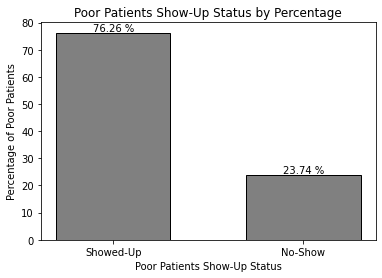

In [57]:
locations = [0, 1]
heights = [percentge_poor_showed_up, percentage_poor_did_not_show_up]
labels = ['Showed-Up', 'No-Show']
plt.bar(locations, heights, tick_label=labels, facecolor='grey', edgecolor='black', width=0.6 )
plt.title('Poor Patients Show-Up Status by Percentage')
plt.xlabel('Poor Patients Show-Up Status')
plt.ylabel('Percentage of Poor Patients')

for i in range(len(locations)):
    plt.text(i,heights[i], f"{round(heights[i],2)} %", ha='center', va='bottom') # to show the data level on top of the bars   

plt.show()

Now it's time to work with the rich group.

In [58]:
# Total number of rich patients
rich_patients.shape[0]

99665

In [59]:
# Number of rich patients who showed-up and who did not show-up
rich_patients.no_show.value_counts()

No     79924
Yes    19741
Name: no_show, dtype: int64

Here we can see that out of 99665 rich patients, 79924 showed-up and 19741 did not show-up.

In [60]:
# percentage of rich patients who showed-up and who did not show-up
percentge_rich_showed_up = (rich_patients.no_show.value_counts().No/rich_patients.shape[0])*100  
percentage_rich_did_not_show_up = (rich_patients.no_show.value_counts().Yes/rich_patients.shape[0])*100  

print(percentge_rich_showed_up, percentage_rich_did_not_show_up)

80.19264536196258 19.807354638037424


Let's plot ourfindings in a bar chart.

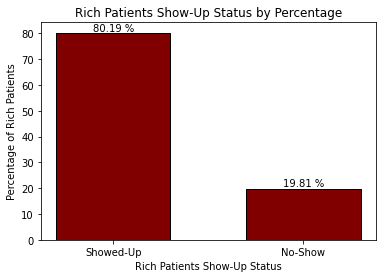

In [61]:
locations = [0, 1]
heights = [percentge_rich_showed_up, percentage_rich_did_not_show_up]
labels = ['Showed-Up', 'No-Show']
plt.bar(locations, heights, tick_label=labels, facecolor='maroon', edgecolor='black', width=0.6 )
plt.title('Rich Patients Show-Up Status by Percentage')
plt.xlabel('Rich Patients Show-Up Status')
plt.ylabel('Percentage of Rich Patients')

for i in range(len(locations)):
    plt.text(i,heights[i], f"{round(heights[i],2)} %", ha='center', va='bottom') # to show the data level on top of the bars   

plt.show()

The result is quite interesting. We can see that poor patients who did not show-up is 23.74% whereas rich patients who did not show up is only 19.81%. To know the actual fact, intensive research is required. But from our above analysis we found that financial ability of the patients has at least some influence on no-show appoitments.

<a id='conclusions'></a>
## Conclusions

This is a Kaggle dataset having 110k medical appointments in Brazil and here we tried to focus from different angle to figure out the reasons/factors behind the no-show appointments. To do that, we considered 'No-show' as dependent variable and 'Age', 'SMS-received' & 'Scholarship' as independent variable. 

First we tried to know what percentage of patients did not show-up and we found 20.19% of patients actually did not show-up. This is a reasonably high prportion because healthcare facilities engage their time and resources against these appointments and it's not expected that one out of every five patients will not show-up even after scheduling their appointments.

Then we tried to focus on age factor and found that older patients missed their appointments by 17.57% whereas younger patients missed their appointments by 22.74%. Therefore we can say that older patient's do not tend to miss their appointments in comparison to younger patients.

Then we tried to know the effect of sending SMS on no-show appointments. In this case, we interestingly found that, out of 110k patients, 75k (68%) did not receive SMS and only 35k (32%) received SMS. However, those who received SMS, 27.57% missed their appointments and those who did not receive SMS, only 16.70% missed their appointments. Therefore, according to this dataset as well as our analysis, we did not find any influence of sending SMS on no-show appointments.

Finally, we tried to see whether there is any influence of financial ability on no-show appointments or not. Here, for analysis purpose, we separated the patients into two different groups those who took financial assistance and those who did not. And we found, those who took financial assistance missed their appointments by 23.74% and those who are well-off and did not take the government financial assistance missed only 19.81%. Hence, we can say that financial ability has at least some influence on no-show appointments.

#### Limitations:
Though we didn't find any duplicate appointment according to 'Appointment ID', we didn't work with distinct patient's data. And therefore, it is possible to have multiple appointments of a patient.

In our analysis, we didn't conducted any statistical test.

We tried to figure out the reason of no-show appointments focusing on different factors. But to know the actual fact, more detailed research is required.